## About
The Netflix dataset contains information about movies and TV shows available on the Netflix platform. It includes details such as title, type (Movie/TV Show), director, cast, country, release year, rating, duration, genres, and date added.
This dataset helps analyze Netflix’s content strategy, user preferences, and trends over time.

### Problem statement
Netflix hosts a massive library of content, but understanding:                                                                                           
    What type of content dominates the platform                                                                                                          
    Which countries produce the most content                                                                                                             
    How content trends change over time                                                                                                                  
    Which genres are most popular                                                                                                                       
is essential for making data-driven decisions.                                                                                                           
The challenge is to analyze this dataset to uncover content patterns, growth trends, and strategic insights.

### Importing libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [6]:
from datetime import datetime as dt

### Importing Dataset

In [5]:
df=pd.read_csv("C:\\master program in data analytics\\FITA\\netflix dataset.csv")

In [6]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [7]:
df.shape

(7787, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


### Cleaning dataset

In [9]:
from datetime import datetime as dt
df["date_added"]=pd.to_datetime(df["date_added"])

In [10]:
df["date_added"].dtype

dtype('<M8[ns]')

In [11]:
for i in df.columns:
    if df[i].isnull().sum():
        print(i,".........",df[i].isnull().sum()*100/df.shape[0],"%","........",df[i].dtype)

director ......... 30.679337357133683 % ........ object
cast ......... 9.220495697958135 % ........ object
country ......... 6.510851419031719 % ........ object
date_added ......... 0.1284191601386927 % ........ datetime64[ns]
rating ......... 0.08989341209708489 % ........ object


In [12]:
df.drop(columns=["show_id","cast"],inplace=True)

In [15]:
df["director"]=df["director"].fillna("Not known")

In [16]:
df["country"].isnull().sum()

np.int64(507)

In [17]:
df["country"]=df["country"].fillna("Not Known")

In [18]:
df["date_added"].unique()

<DatetimeArray>
['2020-08-14 00:00:00', '2017-12-15 00:00:00', '2019-01-05 00:00:00',
 '2016-03-01 00:00:00', '2018-12-03 00:00:00', '2019-02-25 00:00:00',
 '2021-01-01 00:00:00', '2018-07-05 00:00:00', '2021-01-08 00:00:00',
 '2017-12-31 00:00:00',
 ...
 '2020-06-08 00:00:00', '2012-02-21 00:00:00', '2020-05-24 00:00:00',
 '2018-04-07 00:00:00', '2014-12-05 00:00:00', '2018-03-26 00:00:00',
 '2018-06-28 00:00:00', '2017-07-02 00:00:00', '2017-08-09 00:00:00',
 '2017-08-28 00:00:00']
Length: 1513, dtype: datetime64[ns]

In [19]:
df["date_added"].fillna(df["date_added"].median(),inplace=True)

In [20]:
df["rating"].isnull().sum()

np.int64(7)

In [21]:
df["rating"]=df["rating"].fillna("Not Known")

In [22]:
df.isnull().sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
from datetime import datetime as dt
df["month_name"]=df["date_added"].dt.month_name()
df["Day"]=df["date_added"].dt.day_name()
df["weekday"]=df.date_added.dt.weekday
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,genres,description,month_name,Day,weekday
0,TV Show,3%,Not known,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,Friday,4
1,Movie,1920,Vikram Bhatt,India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,December,Friday,4


### EDA

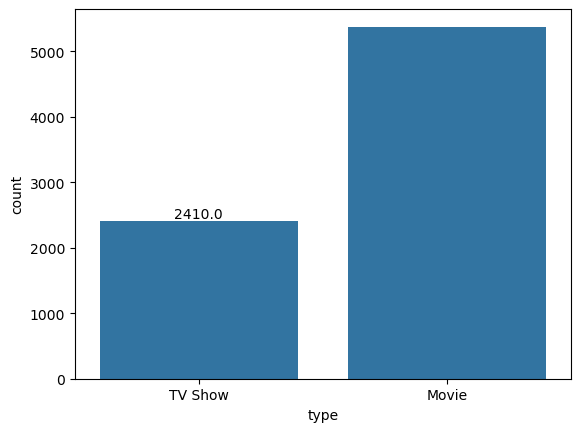

In [25]:
df["type"].value_counts()
ax=sns.countplot(x="type",data=df);
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va='bottom')
    plt.show()


In [26]:
df.groupby(["rating"]).size().sort_values(ascending=False)

rating
TV-MA        2863
TV-14        1931
TV-PG         806
R             665
PG-13         386
TV-Y          280
TV-Y7         271
PG            247
TV-G          194
NR             84
G              39
Not Known       7
TV-Y7-FV        6
UR              5
NC-17           3
dtype: int64

In [27]:
df["rating"]=df["rating"].replace(["NR","G","TV-Y7-FV","UR","NC-17"],["Other"] * 5)

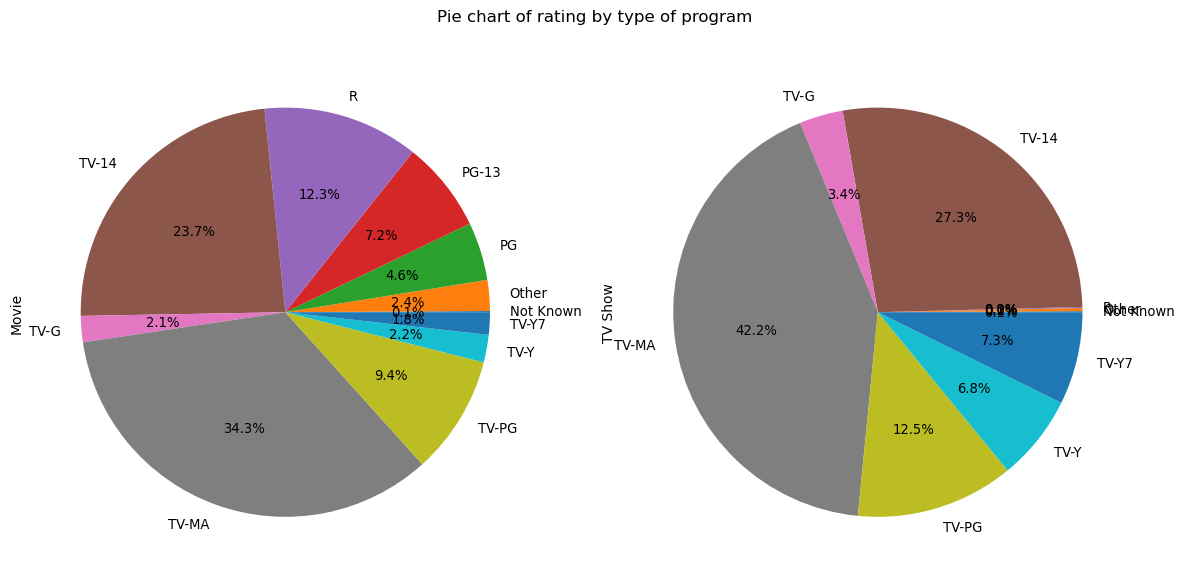

In [28]:
df_groupby = df.groupby(["rating","type"]).size().sort_values(ascending=False).unstack(fill_value=0) 
df_groupby.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(12, 6), legend=False, fontsize=9.5, title="Pie chart of rating by type of program")

plt.tight_layout()
plt.show()

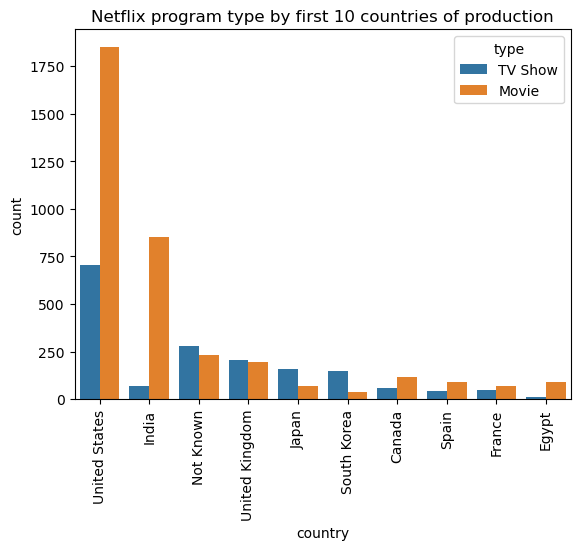

In [29]:
sns.countplot(data=df,x="country",hue="type",order=pd.value_counts(df['country']).iloc[:10].index)

plt.title("Netflix program type by first 10 countries of production")
plt.xticks(rotation=90)
plt.show()

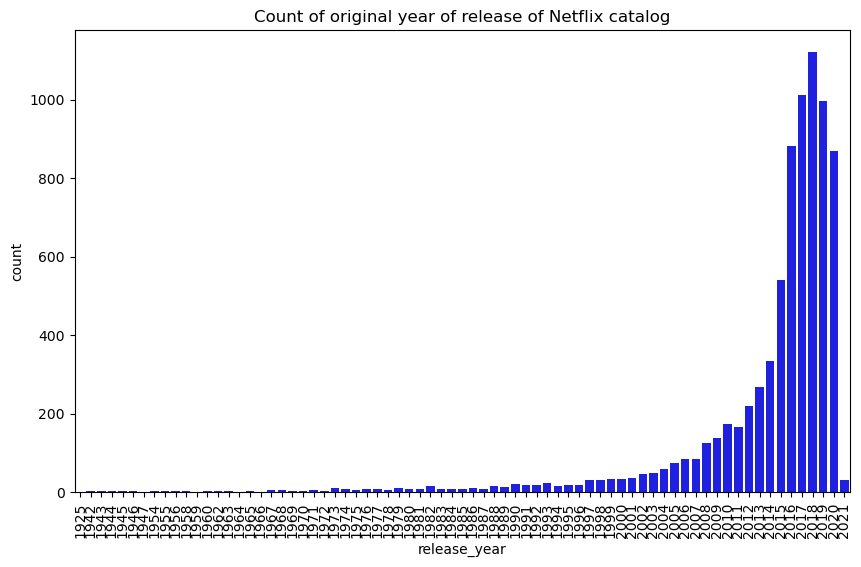

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x="release_year",data=df,color="blue").set_title("Count of original year of release of Netflix catalog")

plt.xticks(rotation=90)
plt.show()

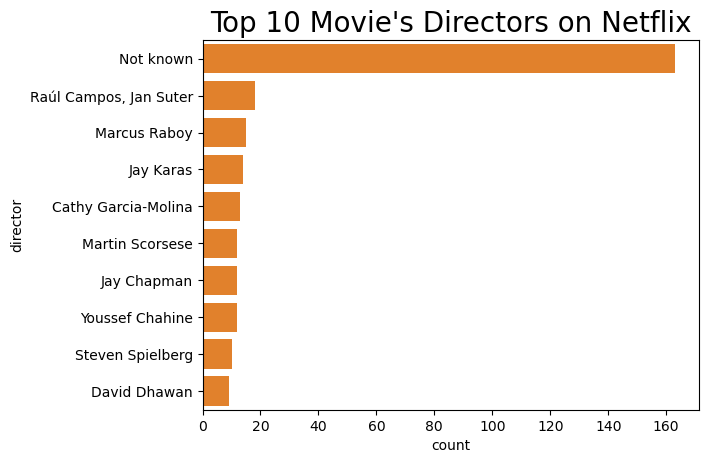

In [31]:
Top10_movies_directors = df[df['type'] == 'Movie']
base_color = sns.color_palette()[1]
sns.countplot(y = 'director',color= base_color, data =
Top10_movies_directors, order =
Top10_movies_directors.director.value_counts().head(10).index)
plt.title("Top 10 Movie's Directors on Netflix", fontsize = 20);

In [32]:
import os
print("operating system:",os.name)
print("current working Directory:",os.getcwd())

operating system: nt
current working Directory: C:\Users\thama


### Conclusion
